# **Happy & Sad images classification with Deep Learning**

## 1. **Import and Setup**

In [1]:
import tensorflow as tf
import os #è ustao per navigare nella struttura dei file più facilmente

In [2]:
#evita OOM error settando GPU o CPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')#diciamo che raccoglie tuttta la gpu
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.1 **Rimuovere immagini ingannevoli**

In [3]:
import cv2
import imghdr #ci permette di fare uan verifica sull'estensione delle nostre immagini

In [4]:
data_dir = 'data'

In [5]:
#per creare una lista dei file preseti nel percorso indicato
os.listdir(data_dir)

['happy', 'sad']

In [6]:
#per creare una lista con tutti file contenuti nella cartella
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
#controlliamo che tutte le immagini abbiano un formato tra quelli specificati
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            #os.remove(image_path)

## 2. **Load Data** 

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
#ci permette di creare il nostro dataset, definisce le labels ossia se è happy or sad e alcune operazioni di preprocessing
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
#creaiamo un iterator che ci permetta di navigare
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
# immagini rappresentate come vettori numpy
batch[0].shape

(32, 256, 256, 3)

In [14]:
#la colonna labels
batch[1]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

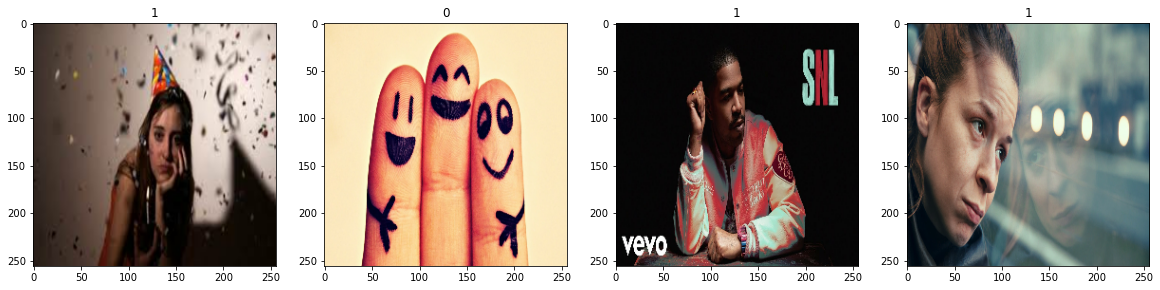

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. **Preprocessing Data**

### 3.1 Scaling Data

In [16]:
# quando lavori con il deep learning vuoi che i valori siano il piuù piccoli possibili,pertanto scaliamo i dati dividendo by 255
data = data.map(lambda x,y: (x/255, y)) #map permette di fare questa trasformazione nella pipeline


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
scaled_iterator = data.as_numpy_iterator()

### 3.2 Split Data

In [18]:
len(data)

10

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size + val_size + test_size

10

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 4. **Deep Model**

### 4.1 Build Deep Learning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [23]:
#definiamo il nostro modello
model = Sequential()

In [24]:
#aggiungiamo i layer
model.add(Conv2D(16, (3,3), 1, activation ='relu', input_shape=(256,256,3)))#input layer 
model.add(MaxPooling2D())# serve per ridurre la dimensionalità

model.add(Conv2D(32, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [25]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics =['accuracy'])#adam è un ottimizzatore

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 4.2 Train


In [27]:
#molto utile se vuoi salvare il tuo modello in particolare checkpoint
logdir ='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 14s 1s/step - loss: 0.7173 - accuracy: 0.5312 - val_loss: 0.5934 - val_accuracy: 0.7656
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.5780 - accuracy: 0.7545 - val_loss: 0.7013 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.5387 - accuracy: 0.7455 - val_loss: 0.5051 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 11s 1s/step - loss: 0.4392 - accuracy: 0.8125 - val_loss: 0.2886 - val_accuracy: 0.9219
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.3154 - accuracy: 0.8482 - val_loss: 0.1921 - val_accuracy: 0.9531
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.1772 - accuracy: 0.9509 - val_loss: 0.1809 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 11s 1s/step - loss: 0.1986 - accuracy: 0.9196 - val_loss: 0.2019 - val_accuracy: 0.9375
Epoch 8/20
7/7 [==================

### 4.3 Plot Performance

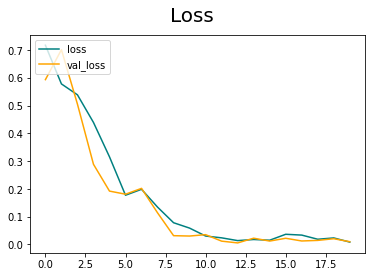

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize =20)
plt.legend(loc="upper left")
plt.show()

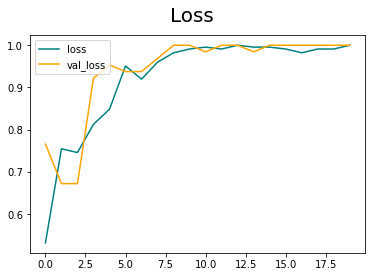

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize =20)
plt.legend(loc="upper left")
plt.show()

## 5. **Evaluate Performance**

### 5.1 Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc =BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 687ms/step


In [35]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.75,Recall:1.0, Accuracy:0.9411764740943909


### 5.2 Test

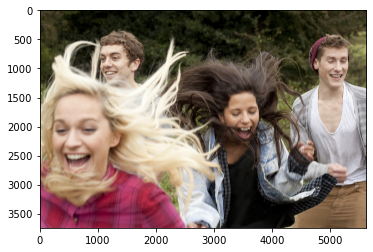

In [36]:
img = cv2.imread('happyTest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

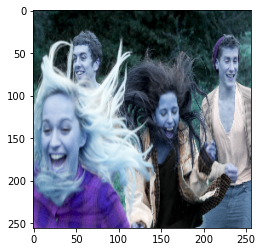

In [37]:
resize= tf.image.resize(img, (256,256))#deve essere du queste dimensioni per essere passato al modello DL
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 66ms/step


In [39]:
yhat

array([[0.10204703]], dtype=float32)

In [41]:
if yhat > 0.5:
    print(f'Predicted clss is Sad')
else:
     print(f'Predicted clss is Happy')

Predicted clss is Happy


## 6. **Save the model**

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [46]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [47]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 154ms/step


array([[0.10204703]], dtype=float32)

In [48]:
if yhat > 0.5:
    print(f'Predicted clss is Sad')
else:
     print(f'Predicted clss is Happy')

Predicted clss is Happy
